In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 载入数据
data = np.genfromtxt("kmeans.txt", delimiter=" ")
# 设置k值
k = 4

In [3]:
# 训练模型
model = KMeans(n_clusters=k)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
# 分类中心点坐标
centers = model.cluster_centers_
print(centers)

[[-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]


In [5]:
# 预测结果
result = model.predict(data)
print(result)

[1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1
 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3
 2 0 1 3 2 0]


In [6]:
model.labels_

array([1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3,
       2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0,
       1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3,
       2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0])

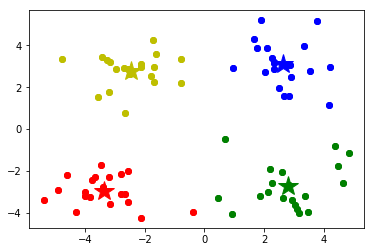

In [8]:
# 画出各个数据点，用不同颜色表示分类
mark = ['or', 'ob', 'og', 'oy']
for i,d in enumerate(data):
    plt.plot(d[0], d[1], mark[result[i]])

# 画出各个分类的中心点
mark = ['*r', '*b', '*g', '*y']

for i,center in enumerate(centers):
    plt.plot(center[0],center[1], mark[i], markersize = 20)

plt.show()

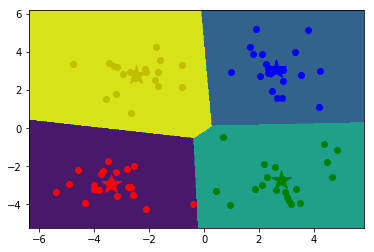

In [10]:
# 获取数据集所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
# 画出各个数据点，用不同颜色表示分类
mark = ['or', 'ob', 'og', 'oy']
for i,d in enumerate(data):
    plt.plot(d[0], d[1], mark[result[i]])

# 画出各个分类的中心点
mark = ['*r', '*b', '*g', '*y']

for i,center in enumerate(centers):
    plt.plot(center[0],center[1], mark[i], markersize = 20)

plt.show()